# LVC: Caviar Investigation Phases Case Study

In this problem, you will study a time-varying criminal network that is repeatedly disturbed by police forces. 
The data for this problem can be found in CAVIAR.zip. 

### Background

Here is some information on the CAVIAR project and the role of certain individuals arrested following the investigation. This investigation lasted two years and ran from 1994 to 1996. The operation brought together investigation units of the Montr´eal police and the Royal Canadian Mounted Police of Canada

As you can see, this case offers a rare opportunity to study a criminal network in upheaval by police forces. This allows us to analyze changes in the network structure and to survey the reaction and adaptation of the participants while they were subjected to an increasing number of distressing constraints. 

According to the police, the role of the actors of the “Serero organization” under investigation are the following: 
- Serero, Daniel (n1) : Mastermind of the network. 
- Pierre Perlini (n3) : Principal lieutenant of Serero, he executes his instructions. 
- Alain (n83) and G´erard (n86) Levy : Investors and transporters of money. 
- Wallace Lee (n85) : Takes care of financial affairs (accountant). 
- Gaspard Lino (n6): Broker in Spain. 
- Samir Rabbat (n11): Provider in Morocco. 
- Lee Gilbert (n88): Trusted man of Wallace Lee (became an informer after the arrest). 
- Beverly Ashton (n106): Spouse of Lino, transports money and documents.  
- Antonio Iannacci (n89): Investor. 
- Mohammed Echouafni (n84): Moroccan investor. 
- Richard Gleeson (n5), Bruno de Quinzio (n8) and Gabrielle Casale (n76) : Charged with recuperating the marijuana. 
- Roderik Janouska (n77): Individual with airport contacts. 
- Patrick Lee (n87): Investor. 
- Salvatore Panetta (n82): Transport arrangements manager. 
- Steve Cunha (n96): Transport manager, owner of a legitimate import company (became an informer after the arrest). 
- Ernesto Morales (n12): Principal organizer of the cocaine import, intermediary between the Colombians and the Serero organization. 
- Oscar Nieri (n17): The handyman of Morales. 
- Richard Brebner (n80): Was transporting the cocaine from the US to Montr´eal. 
- Ricardo Negrinotti (n33): Was taking possession of the cocaine in the US to hand it to Brebner. 
- Johnny Pacheco (n16): Cocaine provider. 

### Objective

- The objective of the case study is to understand, create and visualise the data in phases. 
- Later on, apply the different centrality measures and understand the important nodes.
- Visualise the centrality measure of the important nodes across phases

Note: Please Restart the Kernel if you face Networkx Error


## 1. Importing required libraries

In [1]:
# !pip install networkx

In [2]:
%matplotlib inline

import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore') # to get rid of warning messages

# Remove scientific notations and display numbers with 2 decimal points instead
pd.options.display.float_format = '{:,.2f}'.format        

# Update default background style of plots
sns.set_style(style='darkgrid')

#### 2. Load the data

In [3]:
P1 = pd.read_csv("CAVIAR_Phases - Notebook/phase1.csv")
P2 = pd.read_csv("CAVIAR_Phases - Notebook/phase2.csv")
P3 = pd.read_csv("CAVIAR_Phases - Notebook/phase3.csv")
P4 = pd.read_csv("CAVIAR_Phases - Notebook/phase4.csv")
P5 = pd.read_csv("CAVIAR_Phases - Notebook/phase5.csv")
P6 = pd.read_csv("CAVIAR_Phases - Notebook/phase6.csv")
P7 = pd.read_csv("CAVIAR_Phases - Notebook/phase7.csv")
P8 = pd.read_csv("CAVIAR_Phases - Notebook/phase8.csv")
P9 = pd.read_csv("CAVIAR_Phases - Notebook/phase9.csv")
P10 = pd.read_csv("CAVIAR_Phases - Notebook/phase10.csv")
P11 = pd.read_csv("CAVIAR_Phases - Notebook/phase11.csv")

In [4]:
P1.head()

,Unnamed: 0,1,4,89,83,3,5,88,85,90,2,7,54,6,64,8
0,1,0,1,4,0,4,2,2,9,1,2,0,2,0,1,1
1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,89,1,0,0,0,0,0,0,0,0,0,3,0,0,0,0
3,83,1,0,0,0,0,0,0,0,0,0,0,0,5,0,0
4,3,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0


So we have data in form of an adjacency matrix represented through a data frame. Note that

- the first column (Unnamed: 0) needs to be set as the index
- the columns names and the indices should have the same data type

Let us check the points above.

In [5]:
# Setting first column as the index to achieve the adjacency matrix for each phase

#defining a list with the phases

phases = [P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11]

#Now let us set the first column as the index for all the dataframes
for p in phases:
  p.set_index(p.columns[0], inplace=True)


In [6]:
P1

,1,4,89,83,3,5,88,85,90,2,7,54,6,64,8
Unnamed: 0,,,,,,,,,,,,,,,
1,0,1,4,0,4,2,2,9,1,2,0,2,0,1,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
89,1,0,0,0,0,0,0,0,0,0,3,0,0,0,0
83,1,0,0,0,0,0,0,0,0,0,0,0,5,0,0
3,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
88,1,0,0,0,1,0,0,3,0,0,0,0,1,0,0
85,1,0,0,0,0,0,2,0,0,0,0,0,5,0,0
90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
# Now that we have set the index, check for the consistency in column name and indices data type
P1.index, P1.columns

(Int64Index([1, 4, 89, 83, 3, 5, 88, 85, 90, 2, 7, 54, 6, 64, 8], dtype='int64', name='Unnamed: 0'),
 Index(['1', '4', '89', '83', '3', '5', '88', '85', '90', '2', '7', '54', '6',
        '64', '8'],
       dtype='object'))

In [8]:
# while the index is integer type, the column headers are Object type.
# Lets convert the headers to integer types

phases = [P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11]
col = []
for p in phases:
  for i in p.columns:
    col.append(int(i))
  p.columns = col
  col = []


In [9]:
# let us check if the transformation worked
P1.index, P1.columns

(Int64Index([1, 4, 89, 83, 3, 5, 88, 85, 90, 2, 7, 54, 6, 64, 8], dtype='int64', name='Unnamed: 0'),
 Int64Index([1, 4, 89, 83, 3, 5, 88, 85, 90, 2, 7, 54, 6, 64, 8], dtype='int64'))

## 3. Generate graph

Now, that we have created the adjacency matrix, let us now try to create graphs out of these adjacency matrix.

- We will use the from_pandas_adjacency function and pass on the adjacency matrix for each phase as a dataframe

In [10]:
# great now that it has worked, let us use the dataframe as an adjacency matrix and build our graph

graphs = []
for i,p in enumerate(phases):
  g = 'graph'+str(i+1) 
  print(g)
  g = nx.from_pandas_adjacency(p)
  graphs.append(g)
  print(g.nodes())

# graph1_deg = nx.degree_centrality(graph1)
# print(graph1_deg)

graph1
[5, 83, 3, 4, 1, 89, 2, 85, 7, 54, 88, 6, 64, 90, 8]
graph2
[3, 89, 1, 88, 5, 86, 8, 55, 90, 7, 10, 56, 97, 47, 98, 76, 83, 2, 9, 85, 6, 11, 64, 12]
graph3
[5, 83, 3, 4, 1, 85, 8, 55, 86, 10, 56, 76, 90, 9, 34, 35, 89, 2, 11, 52, 32, 84, 49, 107, 50, 99, 48, 6, 13, 51, 88, 7, 12]
graph4
[5, 83, 3, 4, 1, 89, 2, 86, 9, 35, 85, 7, 11, 53, 84, 49, 107, 90, 8, 13, 51, 63, 109, 106, 31, 88, 6, 12, 47, 14, 52, 76, 15]
graph5
[5, 83, 3, 4, 1, 85, 7, 47, 89, 2, 9, 84, 55, 13, 76, 15, 31, 86, 8, 12, 108, 88, 6, 11, 18, 34, 17, 100, 25, 82, 32, 19]
graph6
[3, 8, 11, 13, 85, 5, 4, 1, 83, 2, 6, 76, 9, 31, 14, 84, 12, 15, 25, 18, 78, 77, 87, 82, 19, 20]
graph7
[3, 18, 88, 5, 4, 1, 62, 85, 6, 76, 78, 87, 81, 34, 14, 17, 19, 20, 77, 22, 74, 79, 61, 68, 55, 12, 16, 75, 69, 28, 83, 2, 9, 8, 11, 15]
graph8
[3, 8, 18, 85, 4, 1, 86, 83, 2, 6, 76, 9, 80, 39, 34, 11, 13, 82, 77, 87, 25, 20, 84, 14, 17, 19, 22, 59, 35, 12, 16, 28, 81, 67, 73, 33, 38, 91, 78, 23, 37, 36]
graph9
[3, 13, 17, 29, 30, 89, 1

## 4. Visualising the graphs

Let us now visualise the graphs that we created above.

****************************************************************************************
Graph for phase: 1


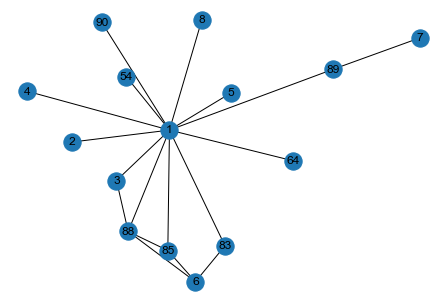

****************************************************************************************
Graph for phase: 2


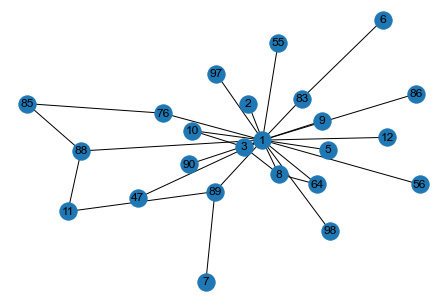

****************************************************************************************
Graph for phase: 3


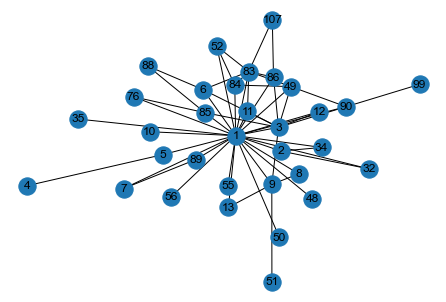

****************************************************************************************
Graph for phase: 4


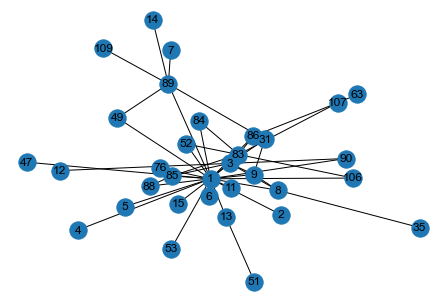

****************************************************************************************
Graph for phase: 5


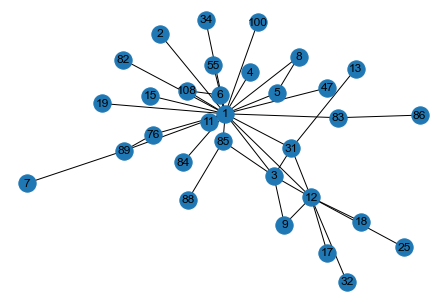

****************************************************************************************
Graph for phase: 6


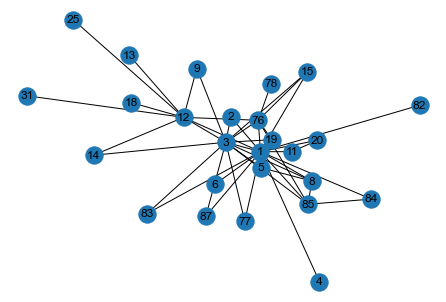

****************************************************************************************
Graph for phase: 7


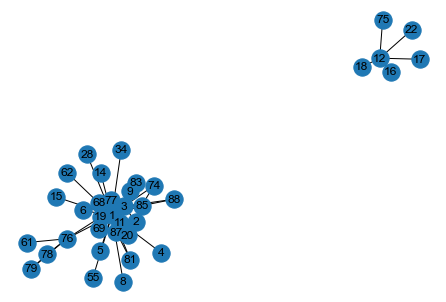

****************************************************************************************
Graph for phase: 8


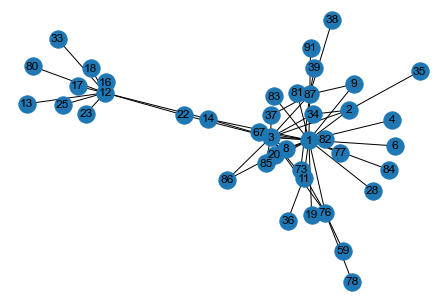

****************************************************************************************
Graph for phase: 9


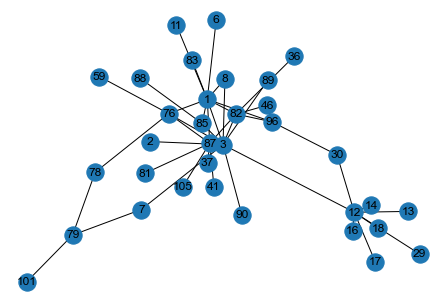

****************************************************************************************
Graph for phase: 10


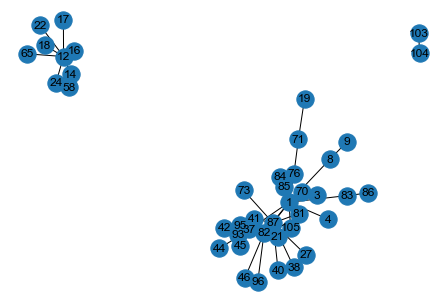

****************************************************************************************
Graph for phase: 11


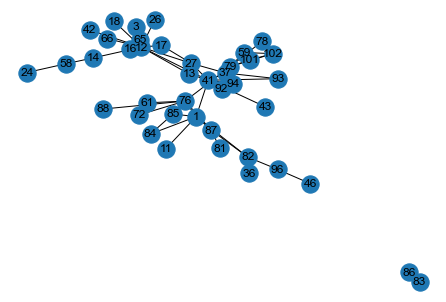

In [11]:
for i,g in enumerate(graphs):
  print("****************************************************************************************")
  print("Graph for phase:", i+1)
  nx.draw(g, with_labels=True)
  plt.title(str(g))
  plt.show()

* 1st Seize happened in phase 4, network size reduced in phase 6
* Node 12 become more active and Network size again increased in phase 8

## 5. Centrality 
Let us now explore the various centrality measures for the above graphs.

### 5a. Degree Centrality
- Let us now calculate the degree centrality

In [12]:
# let us store the degree centralities for each nodes for a graph in a dictionary
deg_cen = {}
for g in graphs:
  deg_cen[g] = nx.degree_centrality(g)

### 5b. Eigen, Betweenness, Closeness Centrality measures

In [13]:
# Similarily, we can generate the other centrality measures
# let us try all the measure that we learnt in the LVC

# Eigen Vector Centrality

eig_cen = {}
for g in graphs:
  eig_cen[g] = nx.eigenvector_centrality(g)


# Betweenness Centrality

betw_cen = {}
for g in graphs:
  betw_cen[g] = nx.betweenness_centrality(g)

# Closeness Centrality

clo_cen = {}
for g in graphs:
  clo_cen[g] = nx.closeness_centrality(g)

### We have now created the dictionaries with the centrality measures

- The dictionaries are deg_cen, eig_cen, betw_cen, clo_cen
- We can sort the dictionaries to obtain the nodes that are the most important.

In [14]:
# let us now sort the degree centrality measure and identify the important nodes.

for ix, g in enumerate(graphs):
  temp_dict = {}
  for w in sorted(deg_cen[g], key=deg_cen[g].get, reverse=True):
    temp_dict[w] = deg_cen[g][w]
  print("Sorted Importance of nodes in terms of deg_cen for Phase {} is {}".format(ix+1, list(temp_dict.keys())[:5]))
  print()

Sorted Importance of nodes in terms of deg_cen for Phase 1 is [1, 88, 85, 6, 83]

Sorted Importance of nodes in terms of deg_cen for Phase 2 is [1, 3, 89, 88, 8]

Sorted Importance of nodes in terms of deg_cen for Phase 3 is [1, 3, 83, 9, 49]

Sorted Importance of nodes in terms of deg_cen for Phase 4 is [1, 83, 3, 89, 85]

Sorted Importance of nodes in terms of deg_cen for Phase 5 is [1, 12, 3, 31, 85]

Sorted Importance of nodes in terms of deg_cen for Phase 6 is [1, 3, 12, 76, 85]

Sorted Importance of nodes in terms of deg_cen for Phase 7 is [1, 3, 76, 12, 85]

Sorted Importance of nodes in terms of deg_cen for Phase 8 is [1, 3, 12, 87, 76]

Sorted Importance of nodes in terms of deg_cen for Phase 9 is [3, 1, 12, 87, 82]

Sorted Importance of nodes in terms of deg_cen for Phase 10 is [1, 87, 37, 12, 82]

Sorted Importance of nodes in terms of deg_cen for Phase 11 is [12, 41, 1, 76, 79]



#### We generated the degree centrality based top5 most important nodes in each phase.
- We can go ahead and repeat the same exercise for the other centraliity measures.

## 6. Underestanding the variation of node importance across phases
- From the above analysis we figure out that some nodes appear to be more important than the others and we will focs our attention on analysing those.

- Let us take out Node1, Node3 and Node12 and visualise their importance across phases. We will look at the between ness and degree centrality only. Learners are encouraged to try out the same for other measures.

In [15]:
# Let us first start with node 1.

node1_deg = []
phases = []
for ix, g in enumerate(graphs):
  node1_deg.append(deg_cen[g][1]*100)
  phases.append(ix+1)

node1_bet = []

for ix, g in enumerate(graphs):
  node1_bet.append(betw_cen[g][1]*100)

# Now, let us calculate for node 3 and 12 too.

# Node3
node3_deg = []
for ix, g in enumerate(graphs):
  node3_deg.append(deg_cen[g][3]*100)

node3_bet = []
for ix, g in enumerate(graphs):
  node3_bet.append(betw_cen[g][3]*100)

# Node12
node12_deg = []
for ix, g in enumerate(graphs):
  if (12 in deg_cen[g].keys()):
    node12_deg.append(deg_cen[g][12]*100)
  else:
    node12_deg.append(None)

node12_bet = []
for ix, g in enumerate(graphs):
  if (12 in betw_cen[g].keys()):
    node12_bet.append(betw_cen[g][12]*100)
  else:
    node12_bet.append(None)


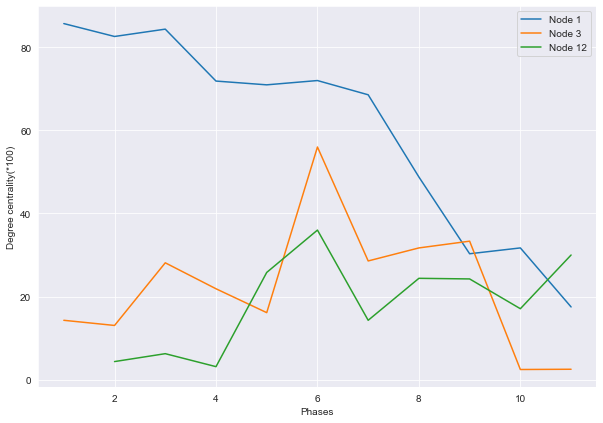

In [16]:
# Now, let us plot the same ust plt.plot

# Plot Degree centrality for nodes 1, 3 and 12
plt.figure(figsize = (10,7))
plt.plot(phases, node1_deg,  label='Node 1')
plt.plot(phases, node3_deg, label='Node 3')
plt.plot(phases, node12_deg, label='Node 12')

plt.ylabel('Degree centrality(*100)')
plt.xlabel('Phases')
plt.legend()
plt.show()

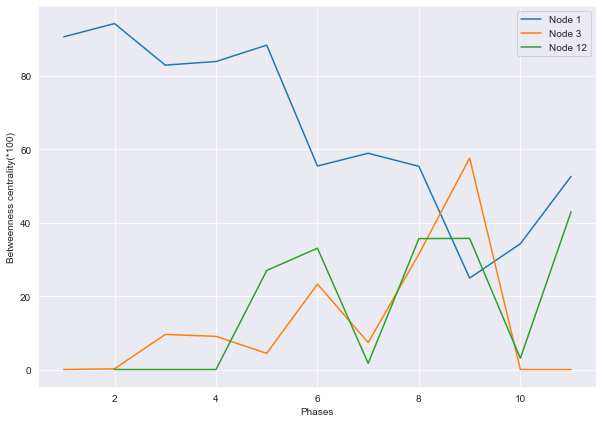

In [17]:
# plotting the Between Centrality

# Plot Degree centrality for nodes 1, 3 and 12
plt.figure(figsize = (10,7))
plt.plot(phases, node1_bet,  label='Node 1')
plt.plot(phases, node3_bet, label='Node 3')
plt.plot(phases, node12_bet, label='Node 12')

plt.ylabel('Betweenness centrality(*100)')
plt.xlabel('Phases')
plt.legend()
plt.show()

* Node 1: Mastermind of the network its Degree and between centrality is decreasing
* Node 3: Principal lieutenant of Serero (executes mastermind instructions)
* Node 12: Principal organizer of the cocaine import, intermediary between the Colombians and the Serero organization, his popularity is increasing in the cocaine/marijuana business. (see previous slide node phase 8 Node 12 network is expanded

## Comments:
- We carried out the analysis on the network and figured out techniques to read adjacency matrices into graphs.
- We later, visualised the graphs, created centrality measures and identified important nodes - N1, N3, N12
- We studied and plotted the variation in the centrality of the important nodes across phases in a bid to understand the affect of disruption of the network.

### Bonus: We can highlight the important nodes in our plots

- Let have a look at the phase 1 graph: garph1


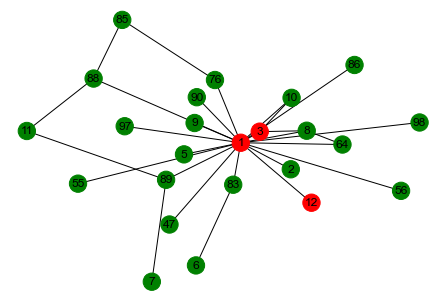

In [18]:
graph2 = nx.from_pandas_adjacency(P2)
color = []
for node in graph2:
    if (node == 1 or node == 12  or node == 3):
        color.append('red')
    else:
        color.append('green')
nx.draw_spring(graph2,node_color=color,with_labels=True)

### Comments:
- The important nodes have been marked in red